In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
db = np.load('covid-train.npz', allow_pickle=True)['db'][()]
X = db['X']

In [2]:
def plot_image(obs, show=True):
    plt.imshow(np.squeeze(obs),cmap='gray')
    if show:
        plt.show()

Po lewej normalne zdjęcia, po prawej ze zwiększonym kontrastem. Uznałem, że wyostrzenie kolorów ułatwi rozpoznawanie sieci struktur.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


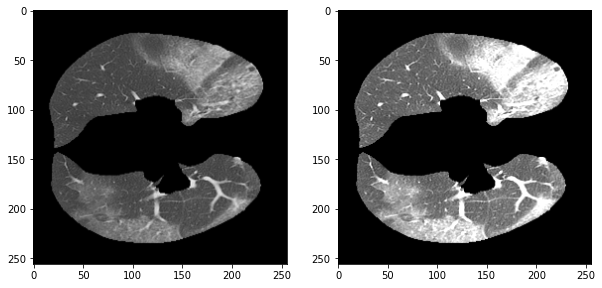

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


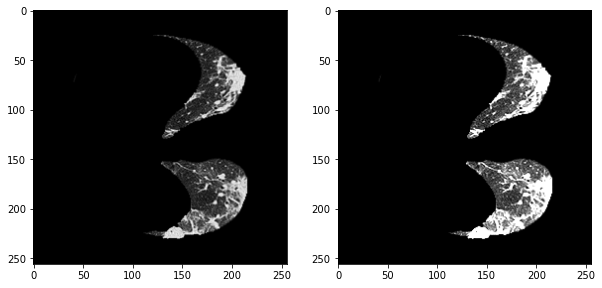

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


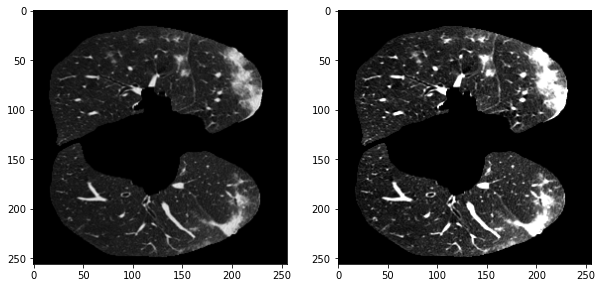

In [3]:
for i in range(3):
    plt.rcParams["figure.figsize"] = (10,5)
    plt.subplot(1, 2, 1)
    plot_image(X[i], show=False)
    plt.subplot(1, 2, 2)
    plot_image(tf.image.adjust_contrast(X[i], 2), show=False)
    plt.show()

# Wyniki

Sieć została prztrenowana tylko na zbiorze covid, wyniki porównamy z poprzednim uczeniem. Do uczenia użyłem sieci, która miała najlepsze wyniki w poprzedniej pracy domowej

In [4]:
import pandas as pd
pre_log = pd.read_csv('model-a438edda-4c67-437d-8a66-d4527ec9ea5b/training.log')
post_log = pd.read_csv('model-50ee330b-78a7-4616-9eca-2ef1df086d81/training.log')

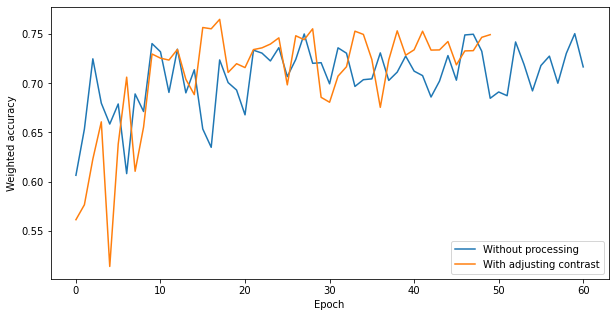

In [5]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(pre_log['epoch'], pre_log['val_waccOA'])
plt.plot(post_log['epoch'], post_log['val_waccOA'])
plt.legend(['Without processing', 'With adjusting contrast'])
plt.ylabel('Weighted accuracy')
plt.xlabel('Epoch')
plt.show()

Jak widać na wykresie udało nam się uzyskać delikatnie lepszy wynik.